In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [219]:
data=pd.read_csv('/Users/srisabarish/Downloads/ML_Test/Intern Housing Data India.csv')

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [221]:
(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

DATA CLEANING

In [222]:
data.dropna(inplace=True)

In [223]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [224]:
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [225]:
ocean_proximity_mapping = {
    'ISLAND': 1,
    'NEAR OCEAN': 2,
    '<1 OCEAN': 3,
    'NEAR BAY': 4,
    'INLAND': 5
}
data['ocean_proximity'] = data['ocean_proximity'].map(ocean_proximity_mapping)
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0              4.0  
1      2401.0      1138.0         8.3014            358500.0              4.0  
2       496.0       177.0         7.2574            352100.0              4.0  
3       558.0       219.0         5.6431            341300.0              4.0  
4       565.0       259.0         3.8462            342200.0              4.0  


SPLITTING TRAIN & TEST DATA

In [226]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [227]:
print(x)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [228]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [230]:
train_data=x_train.join(y_train)

In [231]:
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18037    -121.91     37.23                27.0       4866.0           668.0   
19486    -120.98     37.67                33.0       1433.0           298.0   
18998    -121.96     38.34                14.0       3035.0           680.0   
20002    -119.21     36.10                30.0       1471.0           373.0   
4027     -118.55     34.18                32.0       3011.0           529.0   
...          ...       ...                 ...          ...             ...   
18436    -121.84     37.25                17.0       2363.0           473.0   
17974    -121.96     37.31                26.0       4310.0           678.0   
12153    -117.25     33.70                10.0       5156.0           941.0   
11974    -117.42     34.00                32.0       1617.0           346.0   
12089    -117.33     33.87                14.0       2300.0           335.0   

       population  households  median_income  ocean

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

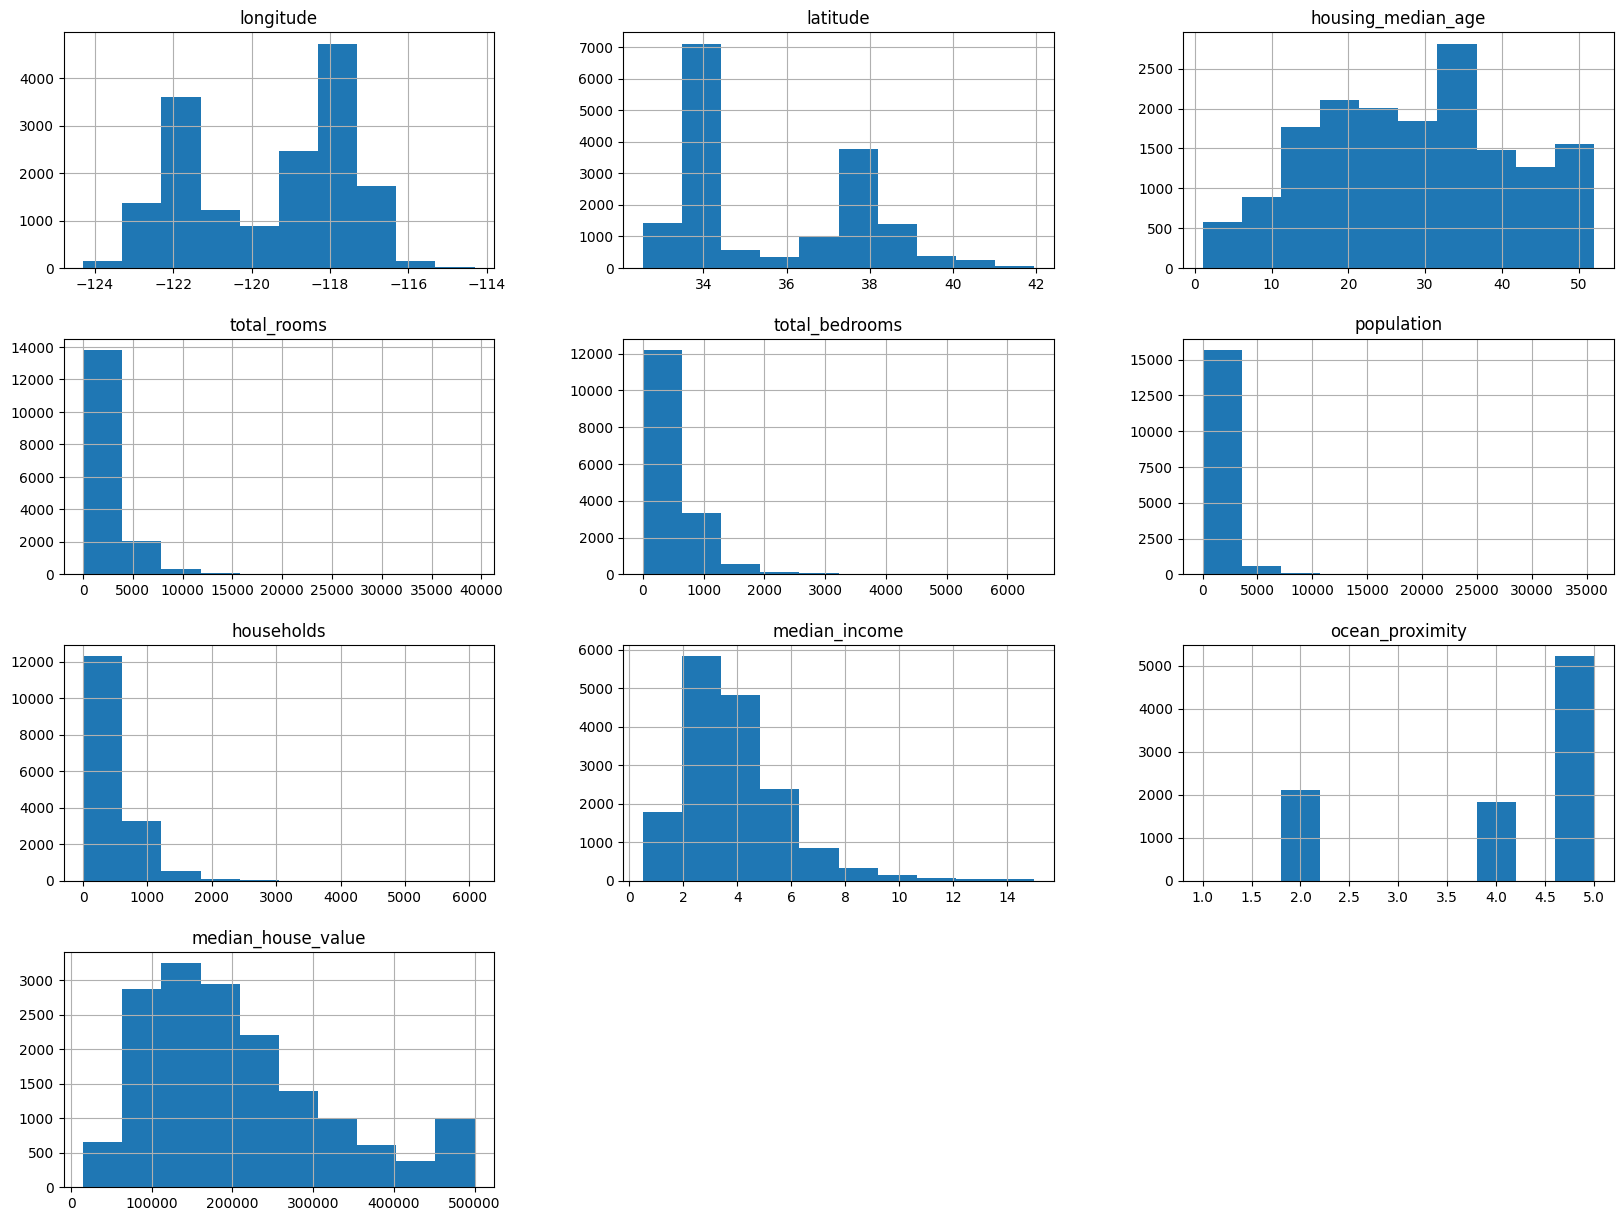

In [232]:
train_data.hist(figsize=(20,15))

<Axes: >

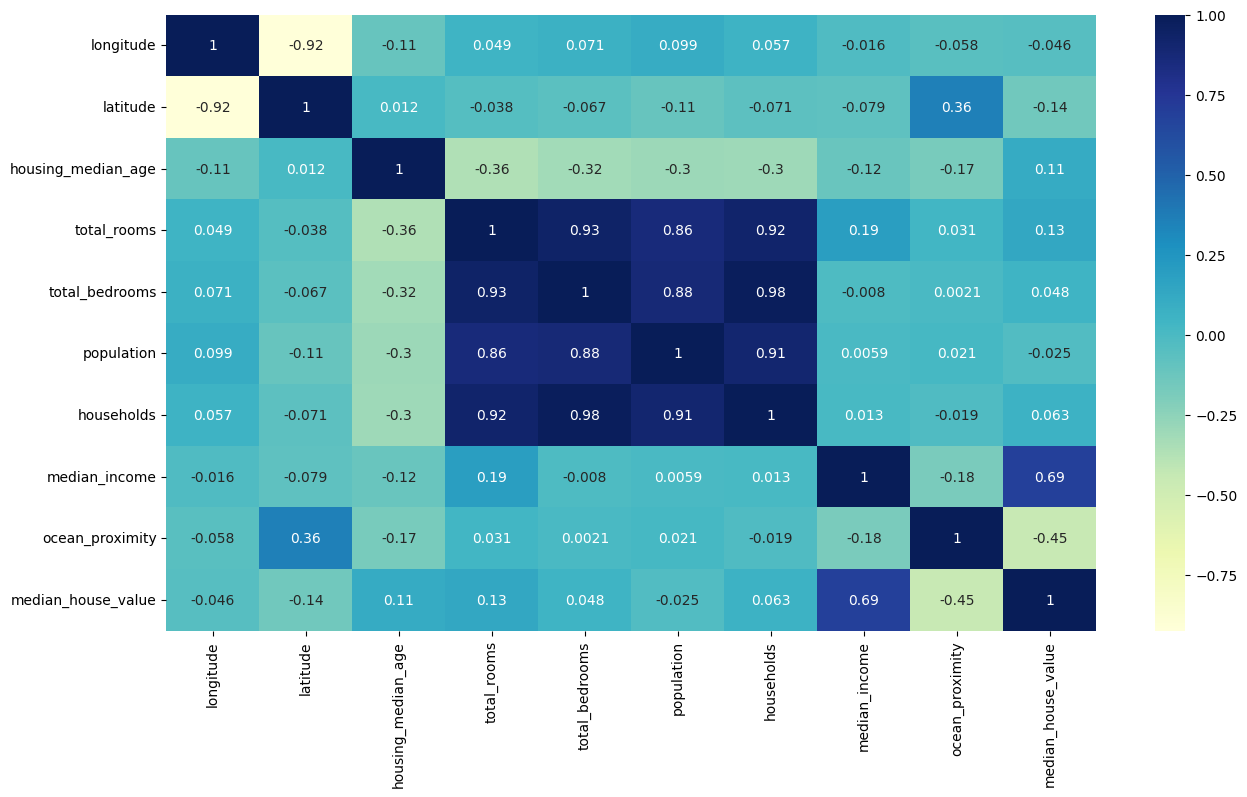

In [233]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

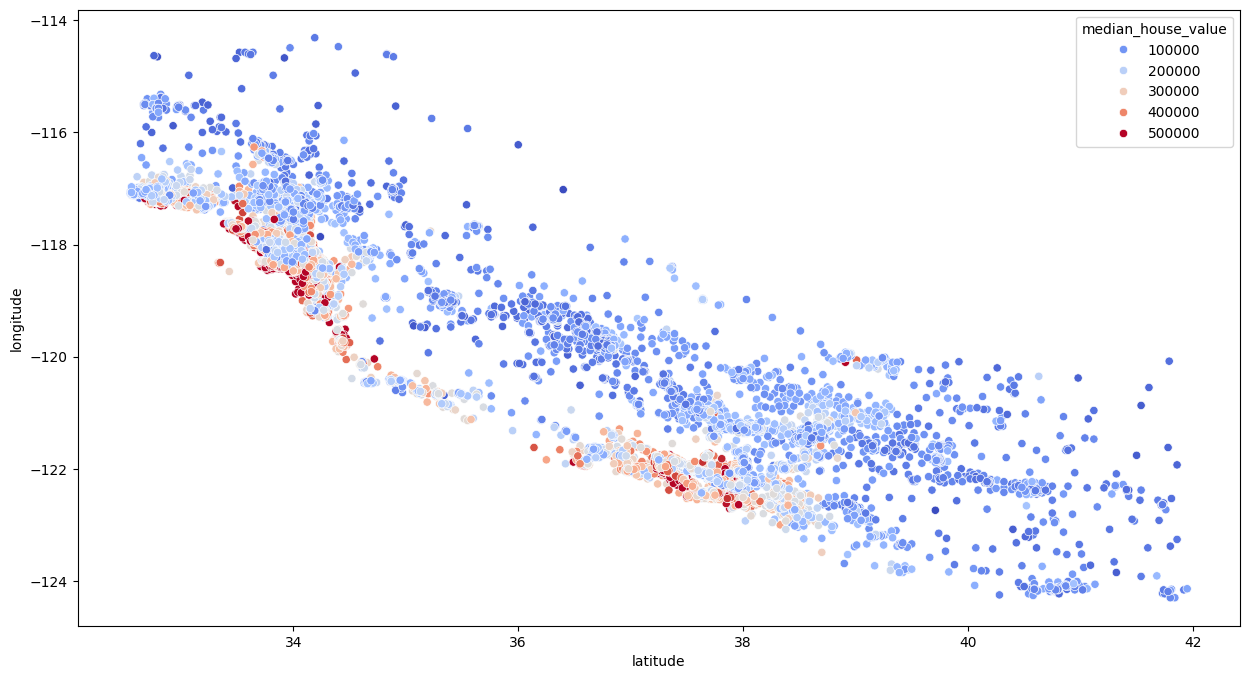

In [234]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

Regression Model

In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [236]:
x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

In [237]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [238]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred = rf_model.predict(x_test_scaled)

In [239]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [240]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error (RMSE): 47539.780349788576
R² Score: 0.8219966011424018
